<img src="https://img.sur.ly/thumbnails/620x343/a/aerofit.co.png" align="center">

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

    Perform descriptive analytics to create a customer profile for each AeroFit treadmill product 
    by developing appropriate tables and charts.

    For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and 
    marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

**Dataset link:** Aerofit_treadmill.csv

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

    The KP281 is an entry-level treadmill that sells for $1,500.

    The KP481 is for mid-level runners that sell for $1,750.

    The KP781 treadmill is having advanced features that sell for $2,500.

# **Importing Libraries and Dataset**

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
warnings.filterwarnings('ignore')

**Loading Data into Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill.txt to aerofit_treadmill (4).txt


In [ ]:
aerofit = pd.read_csv(io.StringIO(uploaded['aerofit_treadmill.txt'].decode('utf-8')))

**Inspecting First Few Rows of the DataFrame**

In [ ]:
aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


**Let's look at the datatype and the number of non-null values in the aerofit dataframe**

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**So none of the columns in the dataset have null values**

# **Data Preprocessing**

### **Unique Values in each column**

Before we move ahead, let's identify the number of unique values in each column

In [ ]:
for i in aerofit.columns:
  print(f'{i} has {aerofit[i].nunique()} unique values')

Product has 3 unique values
Age has 32 unique values
Gender has 2 unique values
Education has 8 unique values
MaritalStatus has 2 unique values
Usage has 6 unique values
Fitness has 5 unique values
Income has 62 unique values
Miles has 37 unique values


### **Let's Explore/Analyze each and every attribute separately**

**Summary Statistics of Attributes**

In [ ]:
aerofit.describe(include=['object','int64'])

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### **Product Column**

In [ ]:
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Observation**

    Most of the customers opted for Entry-Level treadmill (KP281): 80 of them
    
    Followed by 60 customers who opted for Mid-Level treadmill (KP481)

    Less customers opted for treadmill (KP781) with Advanced features: 40 of them

### **Age Column**

**Let's look at the distribution of Age for all the customers**

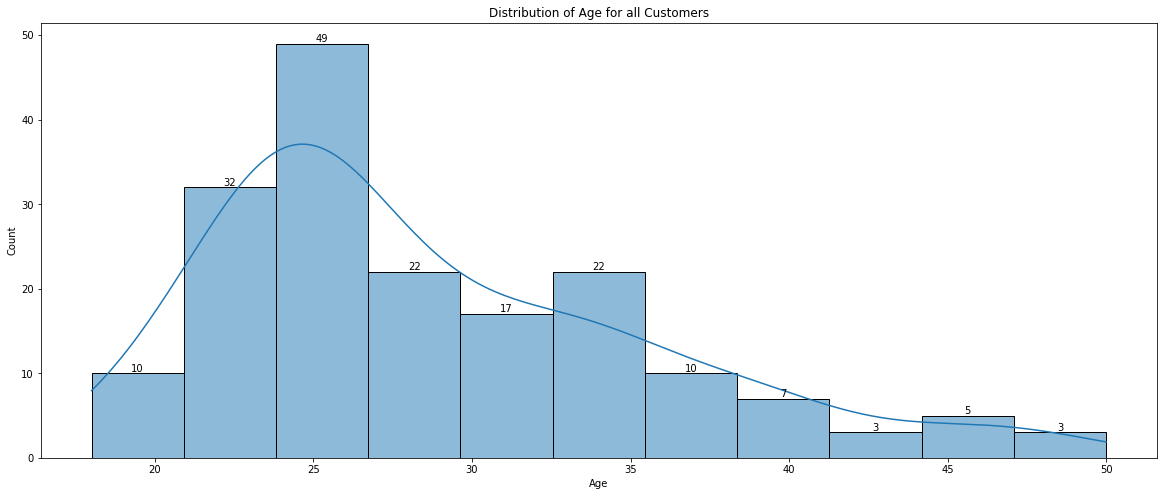

In [ ]:
# Plotting distribution of Age for all the customers

plt.figure(figsize=(20,8))
ax = sns.histplot(data=aerofit, x="Age", kde=True)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Age for all Customers')
plt.show()

**Insights:**

    - The Age is positively skewed with large amount of outliers to the far right. But we need to look at the 
    box-plot of Age distribution by Product Category to understand more about the outliers. As customers of 
    different Age group might prefer different products as per their requirements.

    - The mean Age of customers is approximately 29 years, with 26 being the median Age of the customers and 
    18 and 50 being the minimum and maximum Age of customers in the dataset.

**Let's look at the distribution of Age for all the customers by different Product Categories**

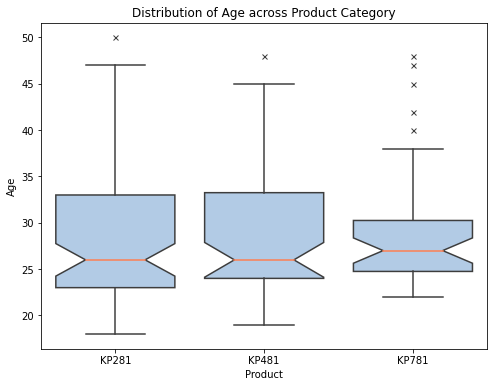

In [ ]:
# Box Plot of distribution of Age across Product Category

plt.figure(figsize=(8,6))
plt.title('Distribution of Age across Product Category')
sns.boxplot(data=aerofit, x="Product", y="Age",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})

plt.show()

**Insights:**

    - The Age distribution for products KP281 and KP481 is almost same with the median age of customers around 26.
    
    - Product KP281 which is an Entry-Level treadmill is preferred mostly by customers of age groups 18 to 47 
    while Product KP481 which is a Mid-Level treadmill is preferred by customers of age groups 19 to 45. 
    There is just one outlier for each of the products : KP281 and KP481

    - The Product KP781, which is an Advanced treadmill is preferred mostly by customers in the Age group of 
    22 to 37, with fair amount (5) of outliers to the far right.

### **Gender Column**

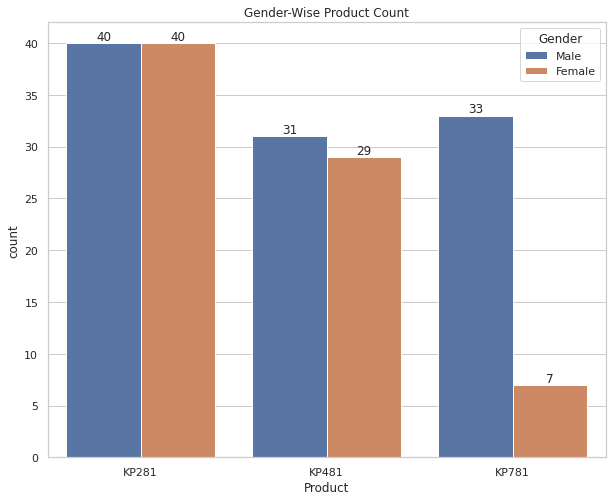

In [ ]:
# Count of Product by Gender

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
plt.title('Gender-Wise Product Count')

ax = sns.countplot(x='Product', hue='Gender', data=aerofit)
for container in ax.containers:
    ax.bar_label(container)

**Insights:**

    - There is an equal distribution of Male(40) and Female(40) customers who prefer Entry-Level treadmill KP281 
    and an almost equal distribution of Male(31) and Female(29) customers who prefer Mid-Level treadmill KP481.

    - More Male(33) customers prefer advanced treadmill KP781 as compared to Female(7) customers.

### **Education Column**

In [ ]:
aerofit_edu = aerofit[['Product','Education']]
aerofit_edu['Count'] = 1

aerofit_edu['Education'] = aerofit_edu['Education'].astype(str)

df=aerofit_edu.pivot_table(index="Product",
                     columns="Education",
                     aggfunc=["count"],
                     fill_value=0)

column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names

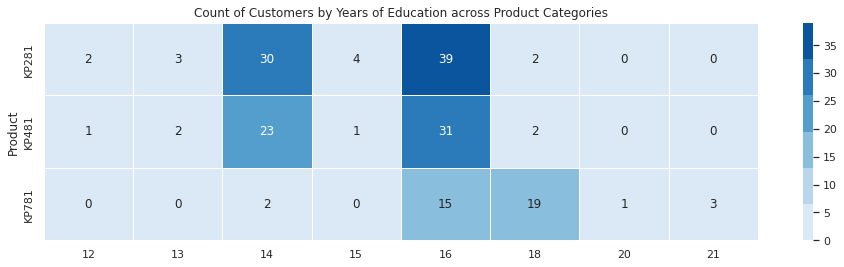

In [ ]:
# Creating a Heatmap of Education of Customers who brought different Aerofit Products

colormap = sns.color_palette("Blues")
plt.figure(figsize=(16,4))
plt.title('Count of Customers by Years of Education across Product Categories')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Insights:**

    - The Entry-Level treadmill(KP281) and the Mid-Level treadmill(KP481) is mostly preferred by customers whose 
    years of Education is between 14 to 16.

    - The Advanced treadmill(KP781) on the other hand is mostly preferred by customers whose years of Education 
    is between 16 to 18.

### **Marital Status**

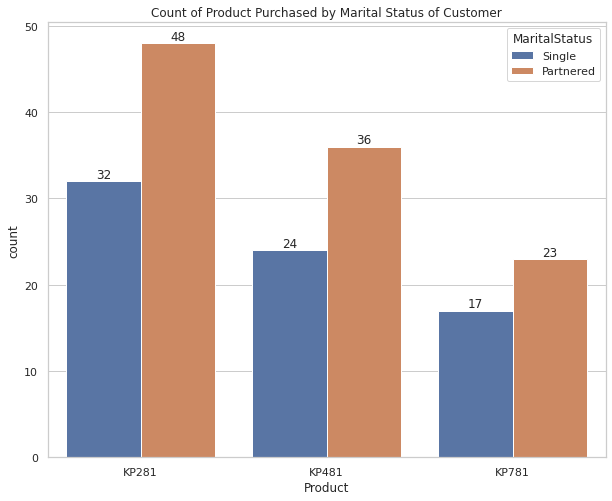

In [ ]:
# Count of Product by Marital Status of Customer

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
plt.title('Count of Product Purchased by Marital Status of Customer')
ax = sns.countplot(data=aerofit, x="Product", hue="MaritalStatus")
for container in ax.containers:
    ax.bar_label(container)

**Insights:**

    - Across all the three category of products - KP281, KP481, & KP781, customers with marital status 
    as 'Partnered' prefer the product more when compared to customers who are 'Single'. 
    
    - The ratio of customers for 'Single':'Partnered' is 2:3 for Entry-Level(KP281) and Mid-Level(KP481) 
    customers, whereas the ratio is 3:4 for Advanced treadmill product(KP781).

### **Usage**

In [ ]:
aerofit_usage = aerofit[['Product','Usage']]
aerofit_usage['Count'] = 1

aerofit_usage['Usage'] = aerofit_usage['Usage'].astype(str)

df=aerofit_usage.pivot_table(index="Product",
                     columns="Usage",
                     aggfunc=["count"],
                     fill_value=0)

column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names

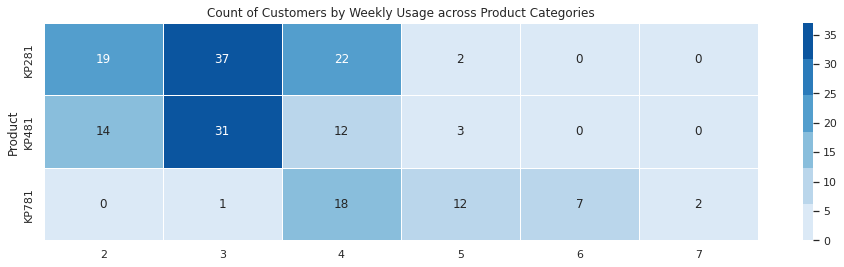

In [ ]:
# Creating a Heatmap of Weekly Usage of Customers who brought different Aerofit Products

colormap = sns.color_palette("Blues")
plt.figure(figsize=(16,4))
plt.title('Count of Customers by Weekly Usage across Product Categories')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Insights:**

    - More than 95% customers who bought Entry-Level product(KP281) and nearly 90% of the customers who bought 
    Mid-Level product(KP481) have weekly Usage between 2 to 4 times.

    - On the other hand more than 96% of customers who bought Advanced treadmill(KP781) have Usage more than 
    4 times during a week.

### **Fitness**

In [ ]:
aerofit_fitness = aerofit[['Product','Fitness']]
aerofit_fitness['Count'] = 1

aerofit_fitness['Fitness'] = aerofit_fitness['Fitness'].astype(str)

df=aerofit_fitness.pivot_table(index="Product",
                     columns="Fitness",
                     aggfunc=["count"],
                     fill_value=0)

column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names

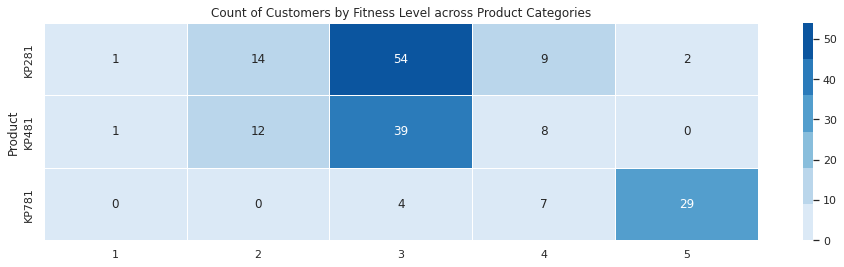

In [ ]:
# Creating a Heatmap of Fitness Level of Customers who brought different Aerofit Products

colormap = sns.color_palette("Blues")
plt.figure(figsize=(16,4))
plt.title('Count of Customers by Fitness Level across Product Categories')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Insights:**

    - Most of the customers (nearly 85% of them) who bought Entry-Level treadmills(KP281) and Mid-Level 
    treadmills(KP481) have decent or not so good fitness levels.

    - 95% of the customers(36/40) who bought Advanced treadmill (KP781) have great or excellent fitness levels.

**Please Note:** Fitness score is on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

### **Income**

**Let's look at the distribution of Income for all the customers**

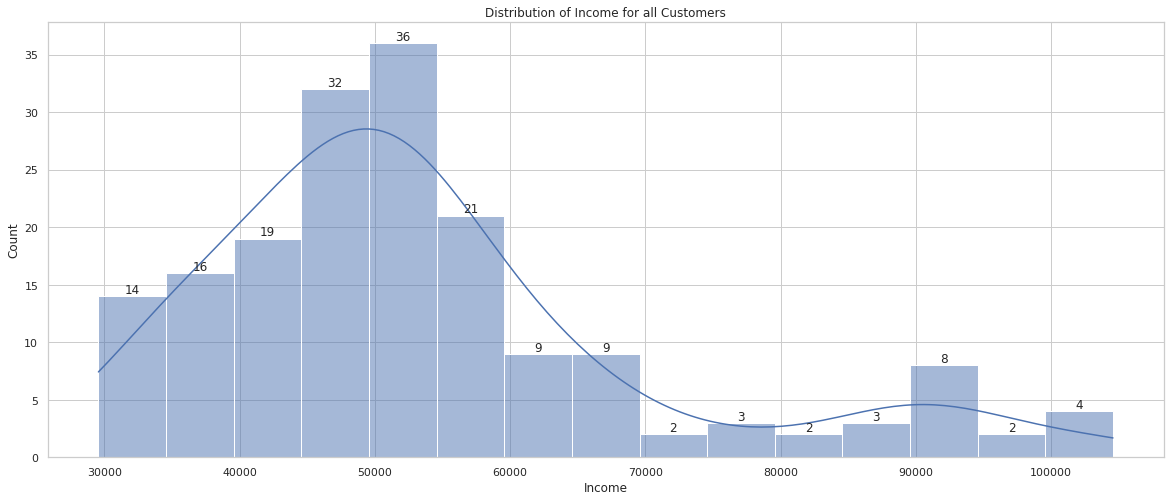

In [ ]:
# Plotting distribution of Income for all the customers

plt.figure(figsize=(20,8))
ax = sns.histplot(data=aerofit, x="Income", kde=True)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Income for all Customers')
plt.show()

**Insights:**

    - Most of the customers who purchased Aerofit products in the last 3 months have mean salary of INR 53719, 
    with Median and Standard Deviation of INR 50596 and INR 16506 respectively.

    - The IQR of the distribution of Salary is = 58668-44058 = 14610. So, nearly 19 customers have salaries 
    which are outliers (> 80583) as is seen below. But, after a closer observation we see that most of these 
    customers are people who have purchased product KP781. So, we need to look at the Income distribution 
    separately for separate Product categories as Product price may vary for different products.

In [ ]:
aerofit[aerofit['Income'] > 80583]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


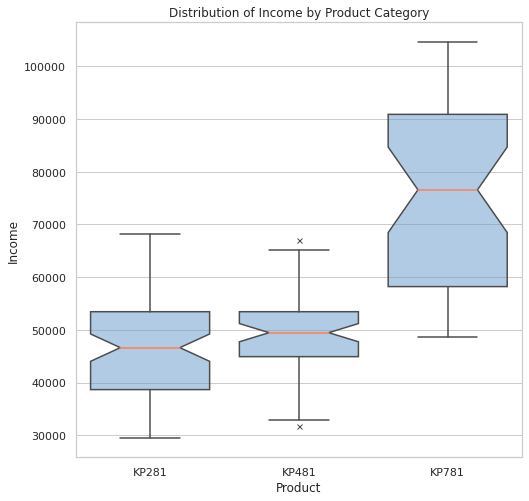

In [ ]:
# Box Plot of distribution of Income by Product Category

plt.figure(figsize=(8,8))
plt.title('Distribution of Income by Product Category')
sns.boxplot(data=aerofit, x="Product", y="Income",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})

plt.show()

**Insights:**

    - Most of the customers who purchased Entry-Level product KP281 have income in the range of INR 29562 to 
    INR 68220, with mean income of the customers being INR 46418.

In [ ]:
aerofit[aerofit['Product'] == 'KP281']['Income'].describe()

count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

**Insights:**

    - Most of the customers who purchased Mid-Level product KP481 have income in the range of nearly INR 32000 
    to 67000 with mean income of the customers being INR 48973. 2 customers who purchased KP481 treadmill are 
    outliers with salaries of INR 31836 and INR 67083 respectively.

In [ ]:
aerofit[aerofit['Product'] == 'KP481']['Income'].describe()

count       60.000000
mean     48973.650000
std       8653.989388
min      31836.000000
25%      44911.500000
50%      49459.500000
75%      53439.000000
max      67083.000000
Name: Income, dtype: float64

**Insights:**

    - The customers who purchased Advanced treadmill have salary in the range of INR 48556 to INR 104581,
    with mean salary of the customers being INR 745441.

In [ ]:
aerofit[aerofit['Product'] == 'KP781']['Income'].describe()

count        40.00000
mean      75441.57500
std       18505.83672
min       48556.00000
25%       58204.75000
50%       76568.50000
75%       90886.00000
max      104581.00000
Name: Income, dtype: float64

### **Miles**

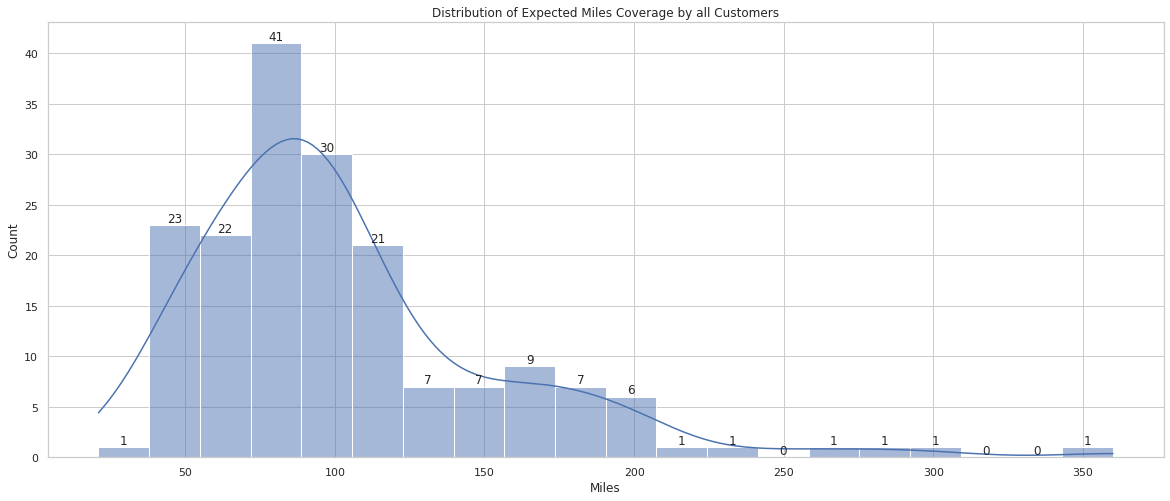

In [ ]:
# Plotting distribution of Miles for all the customers

plt.figure(figsize=(20,8))
ax = sns.histplot(data=aerofit, x="Miles", kde=True)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Expected Miles Coverage by all Customers')
plt.show()

**Insights:**

    - Most of the customers who purchased Aerofit products in the last 3 months expect to walk an average of 
    103 miles or a median of 94 miles.

    - The IQR of the expected miles that customers wish to cover is = 114-66 or nearly 48 miles. Based on the 
    IQR of 48 miles, we can say that nearly 13 customers have expected miles coverage (> 186) as is seen below. 
    All these customers are people who have purchased product KP781. So, we need to look at the Expected Miles 
    Coverage separately for separate Product categories as Expected Miles Coverage may vary across product
    categories.

In [ ]:
aerofit[aerofit['Miles'] > 186]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


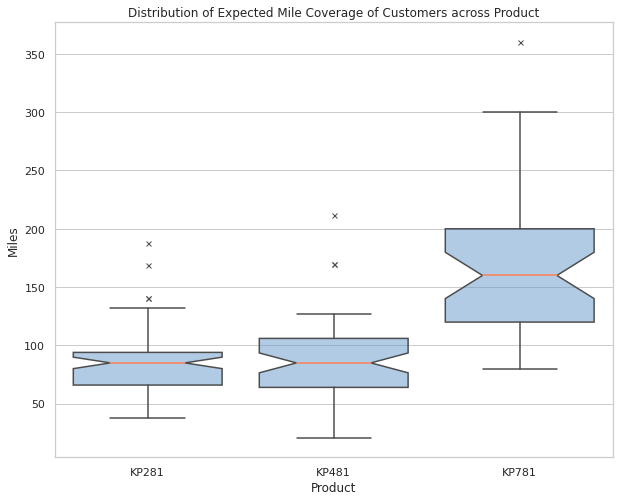

In [ ]:
# Box Plot of distribution of Miles by Product Category

plt.figure(figsize=(10,8))
plt.title('Distribution of Expected Mile Coverage of Customers across Product')
sns.boxplot(data=aerofit, x="Product", y="Miles",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})

plt.show()

**Insights:**

    - From the above figure it is clear that customers who bought Entry-Level treadmill (KP281) and Mid-Level 
    treadmill (KP481) wish to cover similar distance in terms of miles.

    - Customers who bought Advanced treadmill (KP781) are the people who wish to cover more distance in terms 
    of miles, nearly twice the expected distance in miles to be covered on products(KP281 & KP481) purchased 
    by customers.

# **Marginal, Joint and Conditional Probability**

### **Let us look at the distribution of Male/Female customers who have purchased KP281, KP481, or KP781**

In [ ]:
pd.crosstab(index=aerofit["Product"], columns=aerofit["Gender"], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


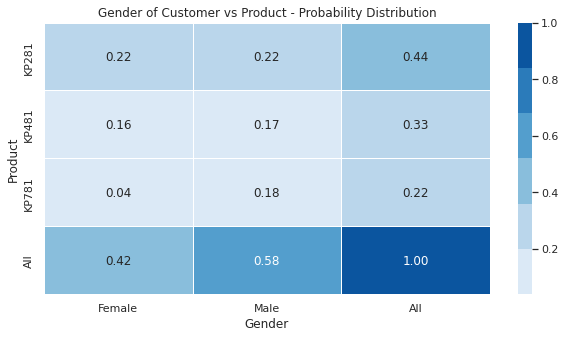

In [ ]:
df = pd.crosstab(index=aerofit["Product"], columns=aerofit["Gender"], margins=True, normalize=True)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(10,5))
plt.title('Gender of Customer vs Product - Probability Distribution')
sns.heatmap(df, annot = True, fmt=".2f", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Observation:**

    - From the above table we see that the Marginal Probability of Female and Male customers who purchased 
    all the three products are 0.42 and 0.58 respectively.

**Let us answer couple of questions with the help of the table above -**

a) What is the Joint Probability of Male Customers who purchased product KP281 ?

b) What is the Joint Probability of Female Customers who purchased product KP481 ?

c) What is the Joint Probability of Male Customers who puchased product KP781 ?

d) Given that a Male Customer purchased a product, what is the probability that it is KP781 ?

e) Given that a Female Customer purchased a product, what is the probability that it is KP781 ?

**Answer to the above questions -**



Let,  

    P(M) - Probability of Male customers
    P(F) - Probability of Female customers
    P(KP281) - Probability of customers who purchased KP281
    P(KP481) - Probability of customers who purchased KP481
    P(KP781) - Probability of customers who purchased KP781

The Joint Probability of Male Customers who purchased product KP281 is nothing but customers who are Male and have purchased product KP281 i.e. $P[M \cap KP281]$ = 0.22

Similarly, the Joint Probability of Female Customers who purchased product KP481 is $P[F \cap KP481]$ = 0.16

Similarly, the Joint Probability of Male Customers who purchased product KP781 is $P[M \cap KP781]$ = 0.18

Lets look at the Conditional Probability of a product being KP781, given that a Male customer purchased a product is,

$P[KP781|M]$ = $P[M \cap KP781]$/$P(M)$ = 0.18/0.58 = 0.31

Lastly, the Conditional Probability of a product being KP781, given that a Female customer purchased a product is,

$P[KP781|F]$ = $P[F \cap KP781]$/$P(F)$ = 0.04/0.42 = 0.095


**Recommendation:**

    - The Entry-Level treadmill (KP281) and the Mid-Level treadmill (KP481) can be offered/recommended to 
    interested Men/Women but Advanced level treadmill (KP781) should be strongly recommended to interested 
    Male counterparts.

### **Let us look at the distribution of customers by Marital Status who have purchased KP281, KP481, or KP781**

In [ ]:
pd.crosstab(index=aerofit["Product"], columns=aerofit["MaritalStatus"], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


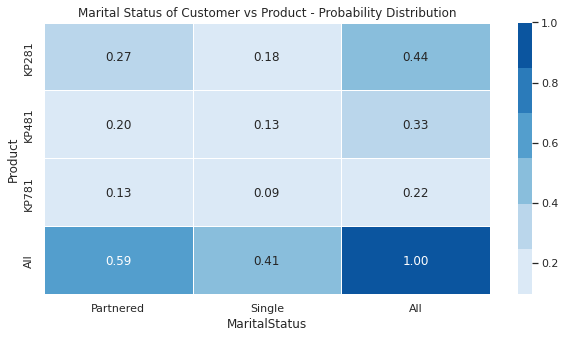

In [ ]:
df = pd.crosstab(index=aerofit["Product"], columns=aerofit["MaritalStatus"], margins=True, normalize=True)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(10,5))
plt.title('Marital Status of Customer vs Product - Probability Distribution')
sns.heatmap(df, annot = True, fmt=".2f", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Observation:**

    - From the above table we see that the Marginal Probability of customers with Marital Status as Partnered 
    and Single are 0.59 and 0.41 respectively.

**Let us answer couple of questions with the help of the table above -**

a) What is the Joint Probability of Customers with Marital Status as 'Partnered' who purchased product KP281 ?

b) What is the Joint Probability of Customers with Marital Status as 'Single' who purchased product KP481 ?

c) What is the Joint Probability of Customers with Marital Status as 'Partnered' who purchased product KP781 ?

d) Given that a Customer purchased the product KP281, what is the probability that his Marital Status is 'Partnered' ?

d) Given that a Customer purchased the product KP481, what is the probability that his Marital Status is 'Partnered' ?

e) Given that a Customer purchased the product KP781, what is the probability that his Marital Status is 'Partnered' ?

**Answer to the above questions -**

Let,  

    P(S) - Probability of Customers with Marital Status : 'Single'
    P(P) - Probability of Customers with Marital Status : 'Partnered'
    P(KP281) - Probability of customers who purchased KP281
    P(KP481) - Probability of customers who purchased KP481
    P(KP781) - Probability of customers who purchased KP781

The Joint Probability of Customers with Marital Status as 'Partnered' who purchased product KP281 is nothing but customers who have Marital Status as 'Partnered' and have purchased product KP281 i.e. $P[P \cap KP281]$ = 0.27

Similarly, Joint Probability of Customers with Marital Status as 'Single' who purchased product KP481 is $P[S \cap KP481]$ = 0.13

Similarly, Joint Probability of Customers with Marital Status as 'Partnered' who purchased product KP781 is $P[P \cap KP781]$ = 0.13

Lets look at the the Conditional Probability of a customer with Marital Status as 'Partnered', given that he purchased the product KP281 is,

$P[P|KP281]$ = $P[P \cap KP281]$/$P(KP281)$ = 0.27/0.44 = 0.613

Next, lets look at the Conditional Probability of a customer with Marital Status as 'Partnered', given that he purchased the product KP481 is,

$P[P|KP481]$ = $P[P \cap KP481]$/$P(KP481)$ = 0.20/0.33 = 0.606

Lastly, the Conditional Probability of a customer with Marital Status as 'Partnered', given that he purchased the product KP781 is,

$P[P|KP781]$ = $P[P \cap KP781]$/$P(KP781)$ = 0.13/0.22 = 0.59

**Recommendation:**

    - All the three product variants - KP281, KP381, KP781 is much preferred by customers whose Marital Status 
    is 'Partnered' and should be strongly recommended to such potential customers.

### **Let us look at the distribution of customers by Years of Education who purchased KP281, KP481, or KP781**

In [ ]:
pd.crosstab(index=aerofit["Product"], columns=aerofit["Education"], margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


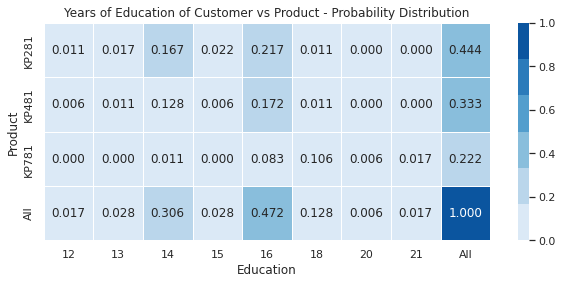

In [ ]:
df = pd.crosstab(index=aerofit["Product"], columns=aerofit["Education"], margins=True, normalize=True)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(10,4))
plt.title('Years of Education of Customer vs Product - Probability Distribution')
sns.heatmap(df, annot = True, fmt=".3f", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Observation:**

    - From the above table we see that the Marginal Probability of customers with Years of Education 
    as 12, 13, 14, 15, 16, 18, 20, 21 is 0.017, 0.028, 0.306, 0.028, 0.472, 0.128, 0.006, 0.017 respectively.

**Let us answer couple of questions with the help of the table above -**

a) What is the Joint Probability of Customers with Years of Education less than equal to 16 years who purchased product KP281 ?

b) What is the Joint Probability of Customers with Years of Education less than equal to 16 years who purchased product KP481 ?

c) What is the Joint Probability of Customers with Years of Education more than equal to 16 years who purchased product KP781 ?

d) Given that a Customer purchased the product KP281, what is the probability that he/she has years of Education less than equal to 16 years?

e) Given that a Customer purchased the product KP481, what is the probability that he/she has years of Education less than equal to 16 years?

f) Given that a Customer purchased the product KP781, what is the probability that he/she has years of Education more than equal to 16 years?

**Answer to the above questions -**

Let,  

    P(Y=12) - Probability of Customers with Years of Education : 12
    P(Y=13) - Probability of Customers with Years of Education : 13
    P(Y=14) - Probability of Customers with Years of Education : 14
    P(Y=15) - Probability of Customers with Years of Education : 15
    P(Y=16) - Probability of Customers with Years of Education : 16
    P(Y=18) - Probability of Customers with Years of Education : 18
    P(Y=20) - Probability of Customers with Years of Education : 20
    P(Y=21) - Probability of Customers with Years of Education : 21
    P(KP281) - Probability of customers who purchased KP281
    P(KP481) - Probability of customers who purchased KP481
    P(KP781) - Probability of customers who purchased KP781

The Joint Probability of Customers with Years of Education less than equal to 16 years who purchased product KP281 is nothing but customers with Years of Education less than equal to 16 years and have purchased product KP281 i.e. $P[Y<=16 \cap KP281]$ = 0.011 + 0.017 + 0.167 + 0.022 + 0.217 = 0.434

Similarly, Joint Probability of Customers with Years of Education less than equal to 16 years who purchased product KP481 is $P[Y<=16 \cap KP481]$ = 0.006+ 0.011 + 0.128 + 0.006 + 0.172 = 0.323

Similarly, Joint Probability of Customers with Years of Education more than equal to 16 years who purchased product KP781 is $P[Y>=16 \cap KP781]$ = 0.083 + 0.106 + 0.006 + 0.017 = 0.212

Lets look at the Conditional Probability of a customer with Years of Education less than equal to 16 years given that he/she purchased the product KP281 =

$P[Y<=16|KP281]$ = $P[Y<=16\cap KP281]$/$P(KP281)$ = 0.434/0.444 = 0.977

Now, lets look at the Conditional Probability of a customer with Years of Education less than equal to 16 years given that he/she purchased the product KP481 =

$P[Y<=16|KP481]$ = $P[Y<=16\cap KP481]$/$P(KP481)$ = 0.323/0.333 = 0.97

Lastly, the Conditional Probability of a customer with Years of Education more than equal to 16 years given that he/she purchased the product KP781 =

$P[Y>=16|KP781]$ = $P[Y>=16\cap KP781]$/$P(KP781)$ = 0.212/0.222 = 0.955

**Recommendation:**

    - Based on the above analysis, we see that Entry-Level treadmill (KP281) and the Mid-Level 
    treadmill (KP481) can be offered/recommended to potential customers with Years of Education 
    less than or equal to 16 Years while the Advanced treadmill (KP781) can be offered/recommended
    to potential customers with Years of Education more than or equal to 16 Years.

### **Let us look at the distribution of customers by Weekly Usage who purchased KP281, KP481, or KP781**

In [ ]:
pd.crosstab(index=aerofit["Product"], columns=aerofit["Usage"], margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


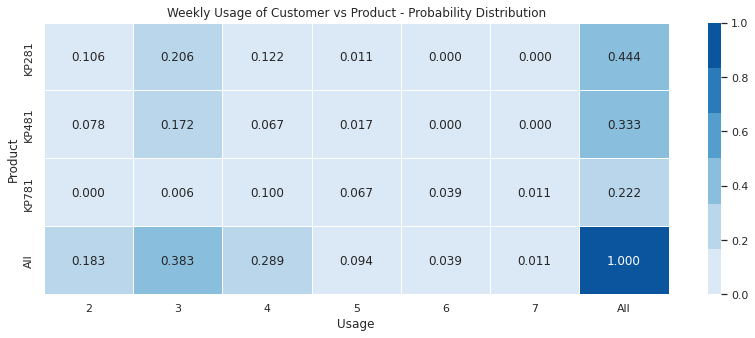

In [ ]:
df = pd.crosstab(index=aerofit["Product"], columns=aerofit["Usage"], margins=True, normalize=True)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(14,5))
plt.title('Weekly Usage of Customer vs Product - Probability Distribution')
sns.heatmap(df, annot = True, fmt=".3f", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Observation:**

    - From the above table we see that the Marginal Probability of customers with Weekly Usage of 2, 3, 4, 5, 6, 7 
    is 0.183, 0.383, 0.289, 0.094, 0.039, 0.011 respectively

**Let us answer couple of questions with the help of the table above -**

a) What is the Joint Probability of Customers with weekly Usage less than equal to 4 who purchased product KP281 ?

b) What is the Joint Probability of Customers with weekly Usage less than equal to 4 who purchased product KP481 ?

c) What is the Joint Probability of Customers with weekly Usage more than equal to 4 who purchased product KP781 ?

d) Given that a Customer purchased the product KP281, what is the probability that the weekly Usage is atmost 4?

e) Given that a Customer purchased the product KP481, what is the probability that the weekly Usage is atmost 4?

f) Given that a Customer purchased the product KP781, what is the probability that the weekly Usage is atleast 4?

**Answer to the above questions -**

Let,  

    P(U=2) - Probability of Customers with Weekly Usage of 2
    P(U=3) - Probability of Customers with Weekly Usage of 3
    P(U=4) - Probability of Customers with Weekly Usage of 4
    P(U=5) - Probability of Customers with Weekly Usage of 5
    P(U=6) - Probability of Customers with Weekly Usage of 6
    P(U=7) - Probability of Customers with Weekly Usage of 7
    P(KP281) - Probability of customers who purchased KP281
    P(KP481) - Probability of customers who purchased KP481
    P(KP781) - Probability of customers who purchased KP781

The Joint Probability of Customers with weekly Usage less than equal to 4 who purchased product KP281 is nothing but customers with weekly Usage less than equal to 4 and have purchased product KP281 i.e. $P[U<=4 \cap KP281]$ = 0.106 + 0.206 + 0.122 = 0.434

Similarly, Joint Probability of Customers with weekly Usage less than equal to 4 who purchased product KP481 is $P[U<=4 \cap KP481]$ = 0.078 + 0.172 + 0.067 = 0.317

Similarly, Joint Probability of Customers with weekly Usage more than equal to 4 who purchased product KP781 is $P[U>=4 \cap KP781]$ = 0.100 + 0.067 + 0.039 + 0.011 = 0.217

Lets look at the Conditional Probability of a customer with weekly Usage of atmost 4 given that he/she purchased the product KP281 =

$P[U<=4|KP281]$ = $P[U<=4\cap KP281]$/$P(KP281)$ = 0.434/0.444 = 0.977

Now, lets look at the Conditional Probability of a customer with weekly Usage of atmost 4 given that he/she purchased the product KP481 =

$P[U<=4|KP481]$ = $P[U<=4\cap KP481]$/$P(KP481)$ = 0.317/0.333 = 0.952

Lastly, the Conditional Probability of a customer with weekly Usage of atleast 4 given that he/she purchased the product KP781 =

$P[U>=4|KP781]$ = $P[U>=4\cap KP781]$/$P(KP781)$ = 0.217/0.222 = 0.977

**Recommendation:**

    - Based on the above analysis, we see that Entry-Level treadmill (KP281) and the Mid-Level 
    treadmill (KP481) can be offered/recommended to potential customers whose weekly usage is 
    less than or equal to 4 times whereas Advanced treadmill (KP781) can be offered/recommended
    to potential customers whose weekly usage is more than or equal to 4 times.

### **Let us look at the distribution of customers by Fitness Level who purchased KP281, KP481, or KP781**

In [ ]:
pd.crosstab(index=aerofit["Product"], columns=aerofit["Fitness"], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


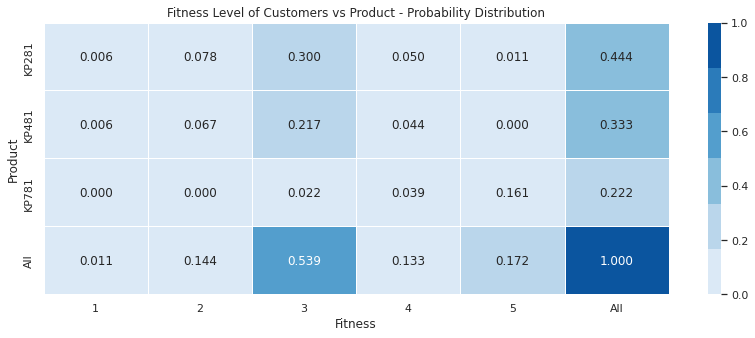

In [ ]:
df = pd.crosstab(index=aerofit["Product"], columns=aerofit["Fitness"], margins=True, normalize=True)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(14,5))
plt.title('Fitness Level of Customers vs Product - Probability Distribution')
sns.heatmap(df, annot = True, fmt=".3f", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Observation:**

    - From the above table we see that the Marginal Probability of customers with Fitness Level 1, 2, 3, 4, 5
    is 0.011, 0.144, 0.539, 0.133, 0.172 respectively

**Please Note:** Fitness score is on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Let us answer couple of questions with the help of the table above -**

a) What is the Joint Probability of Customers with Fitness Score less than equal to 3 who purchased product KP281 ?

b) What is the Joint Probability of Customers with Fitness Score less than equal to 3 who purchased product KP481 ?

c) What is the Joint Probability of Customers with Fitness Score more than equal to 3 who purchased product KP781 ?

d) Given that a Customer purchased the product KP281, what is the probability that the Fitness Score is atmost 3?

e) Given that a Customer purchased the product KP481, what is the probability that the Fitness Score is atmost 3?

f) Given that a Customer purchased the product KP781, what is the probability that the Fitness Score is atleast 3?

**Answer to the above questions -**

Let,  

    P(S=1) - Probability of Customers with Fitness Score of 1
    P(S=2) - Probability of Customers with Fitness Score of 2
    P(S=3) - Probability of Customers with Fitness Score of 3
    P(S=4) - Probability of Customers with Fitness Score of 4
    P(S=5) - Probability of Customers with Fitness Score of 5
    P(KP281) - Probability of customers who purchased KP281
    P(KP481) - Probability of customers who purchased KP481
    P(KP781) - Probability of customers who purchased KP781

The Joint Probability of Customers with Fitness Score less than equal to 3 who purchased product KP281 is nothing but customers with Fitness Score less than equal to 3 and have purchased product KP281 i.e. $P[S<=3 \cap KP281]$ = 0.006 + 0.078 + 0.3 = 0.384

Similarly, Joint Probability of Customers with Fitness Score less than equal to 3 who purchased product KP481 is $P[S<=3 \cap KP481]$ = 0.006 + 0.067 + 0.217 = 0.29

Similarly, Joint Probability of Customers with Fitness Score more than equal to 3 who purchased product KP781 is $P[S>=3 \cap KP781]$ = 0.022 + 0.039 + 0.161 = 0.222

Lets look at the Conditional Probability of a customer with Fitness Score of atmost 3 given that he/she purchased the product KP281 = 

$P[S<=3|KP281]$ = $P[S<=3\cap KP281]$/$P(KP281)$ = 0.384/0.444 = 0.864

Now, lets look at the Conditional Probability of a customer with Fitness Score of atmost 3 given that he/she purchased the product KP481 = 

$P[S<=3|KP481]$ = $P[S<=3\cap KP481]$/$P(KP481)$ = 0.29/0.333 = 0.87

Lastly, the Conditional Probability of a customer with Fitness Score of atleast 3 given that he/she purchased the product KP781 = 

$P[S>=3|KP781]$ = $P[S>=3\cap KP781]$/$P(KP781)$ = 0.222/0.222 = 1

**Recommendation:**

    - Based on the above analysis, we see that Entry-Level treadmill (KP281) and the Mid-Level 
    treadmill (KP481) can be offered/recommended to potential customers whose Fitness Level is less 
    than or equal to 3 whereas Advanced treadmill (KP781) can be offered/recommended to potential 
    customers whose Fitness Level is more than or equal to 3.

**Please Note:** Fitness score is on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

# **Correlation**

### **Analysis of correlation between different factors in the dataset**

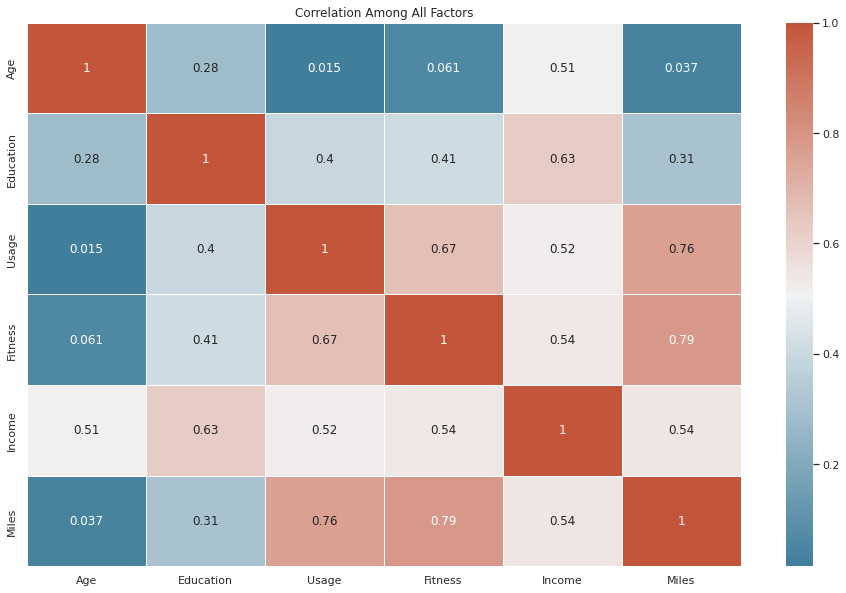

In [ ]:
df_corr = aerofit.corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(df_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

    - Irrespective of Product Categories, we see that there is a high positive correlation between 
    Education and Income, Usage and Fitness, Usage and Miles, & Fitness and Miles.

    - However let's look at the correlation amongst all the different factors separately for better customer 
    segmentation as the correlation might look completely different for individual product categories.

### **Let's analyze the correlation among different factors for Product KP281**

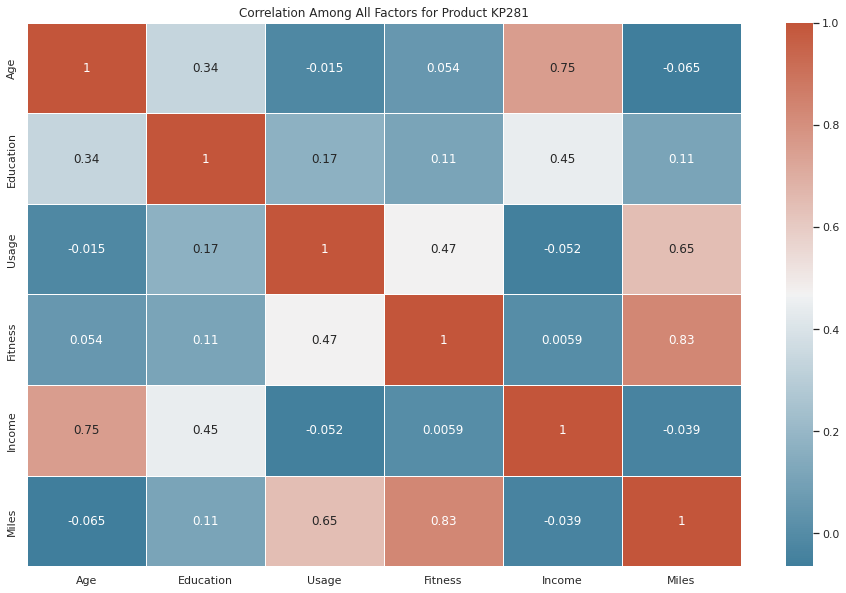

In [ ]:
df_corr = aerofit[aerofit['Product'] == 'KP281'].corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors for Product KP281')
sns.heatmap(df_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

    - For Product KP281, There is a positive correlation between Age and Income, Usage and Miles, & 
    Fitness and Miles. The same is shown in the below subplots.

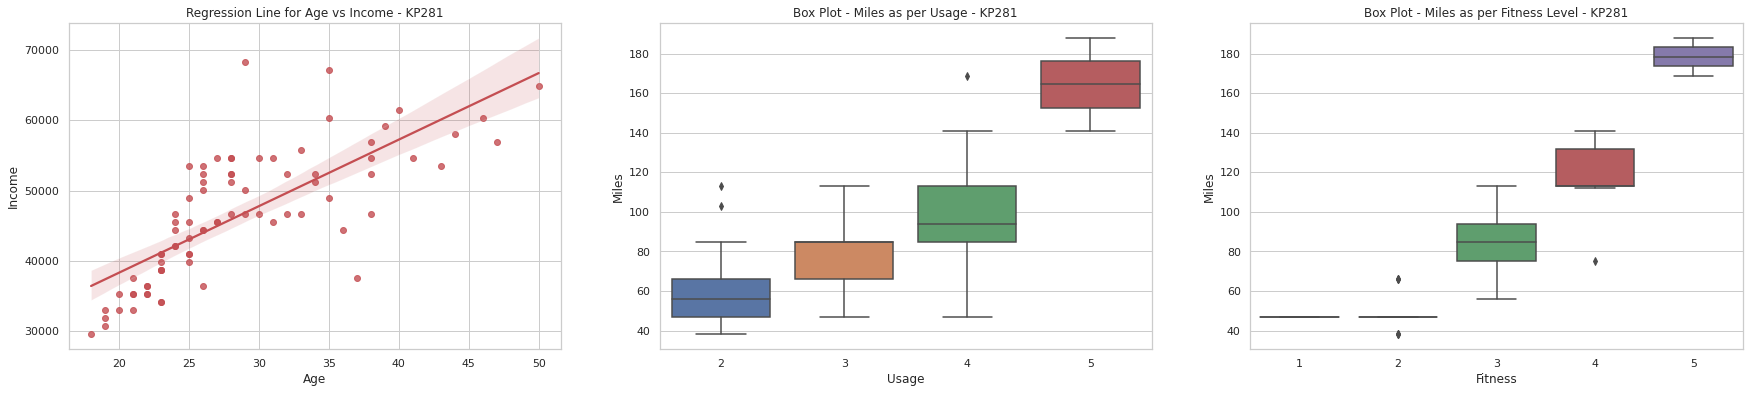

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,6))
sns.regplot(x="Age", y="Income", data=aerofit[aerofit['Product'] == 'KP281'], marker="o", color = 'r', ax=axes[0])
axes[0].set_title('Regression Line for Age vs Income - KP281')
sns.boxplot(x="Usage", y="Miles", data=aerofit[aerofit['Product'] == 'KP281'], ax=axes[1])
axes[1].set_title('Box Plot - Miles as per Usage - KP281')
sns.boxplot(x="Fitness", y="Miles", data=aerofit[aerofit['Product'] == 'KP281'], ax=axes[2])
axes[2].set_title('Box Plot - Miles as per Fitness Level - KP281')
plt.show()

### **Let's analyze the correlation among different factors for Product KP481**

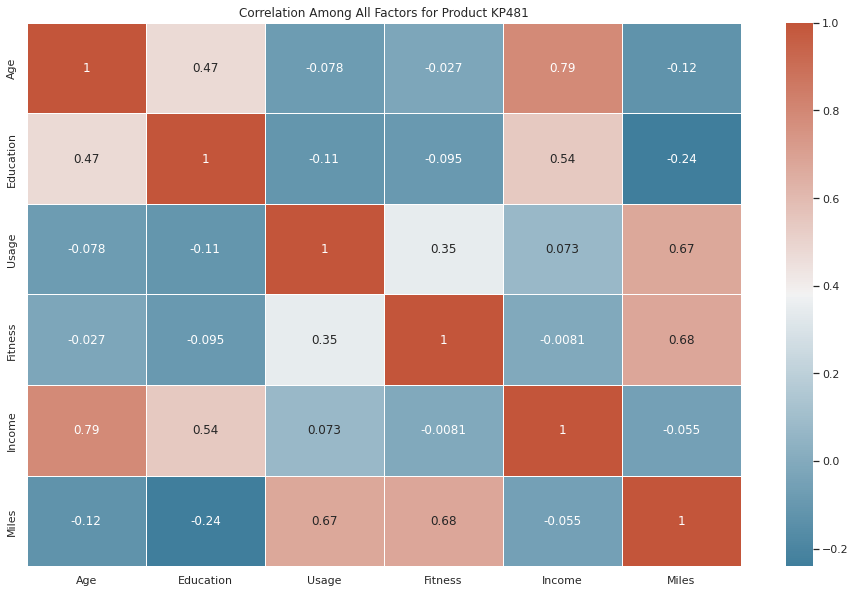

In [ ]:
df_corr = aerofit[aerofit['Product'] == 'KP481'].corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors for Product KP481')
sns.heatmap(df_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

    - For Product KP481, There is a positive correlation between Age and Income, Usage and Miles, 
    & Fitness and Miles. The same is shown in the below subplots.

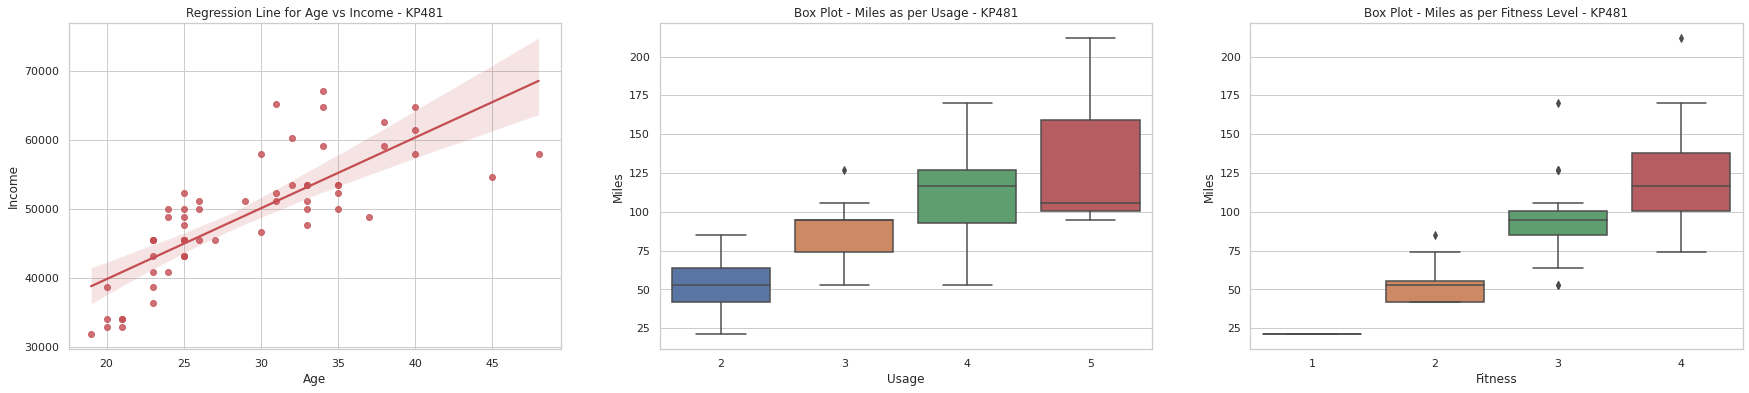

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,6))
sns.regplot(x="Age", y="Income", data=aerofit[aerofit['Product'] == 'KP481'], marker="o", color = 'r', ax=axes[0])
axes[0].set_title('Regression Line for Age vs Income - KP481')
sns.boxplot(x="Usage", y="Miles", data=aerofit[aerofit['Product'] == 'KP481'], ax=axes[1])
axes[1].set_title('Box Plot - Miles as per Usage - KP481')
sns.boxplot(x="Fitness", y="Miles", data=aerofit[aerofit['Product'] == 'KP481'], ax=axes[2])
axes[2].set_title('Box Plot - Miles as per Fitness Level - KP481')
plt.show()

### **Let's analyze the correlation among different factors for Product KP781**

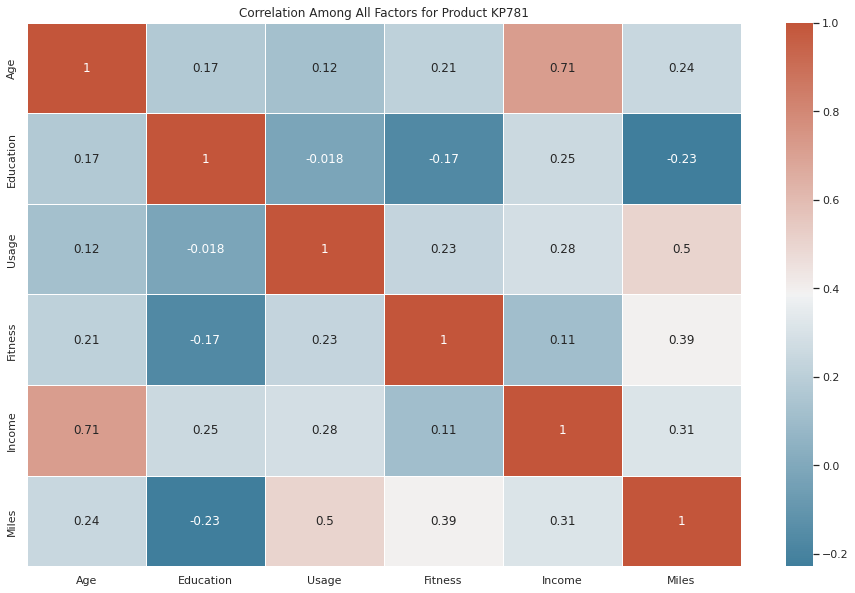

In [ ]:
df_corr = aerofit[aerofit['Product'] == 'KP781'].corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors for Product KP781')
sns.heatmap(df_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

**Insights:**

    - For Product KP781, There is a positive correlation between Age and Income, & Usage and Miles.
    The same is shown in the below subplots.

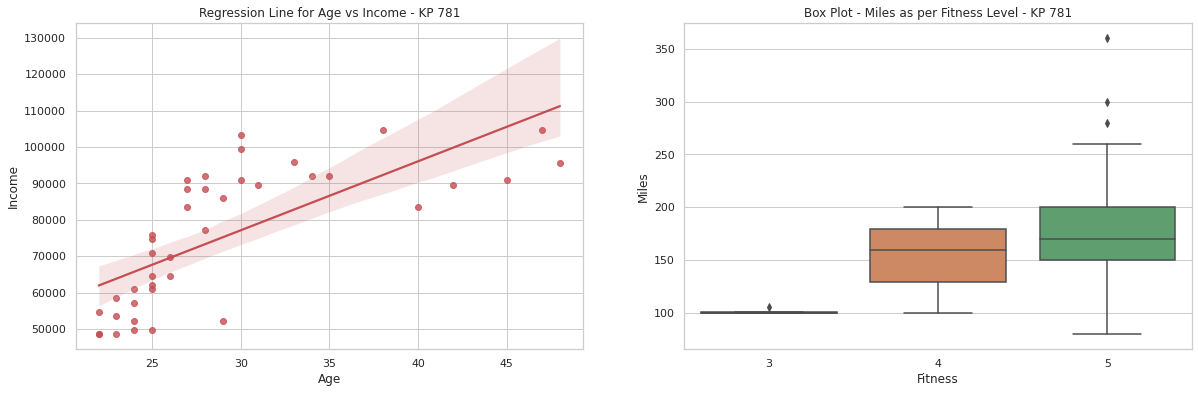

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.regplot(x="Age", y="Income", data=aerofit[aerofit['Product'] == 'KP781'], marker="o", color = 'r', ax=axes[0])
axes[0].set_title('Regression Line for Age vs Income - KP 781')
sns.boxplot(x="Fitness", y="Miles", data=aerofit[aerofit['Product'] == 'KP781'], ax=axes[1])
axes[1].set_title('Box Plot - Miles as per Fitness Level - KP 781')
plt.show()

# **Customer Profiling**

### **Analysis of Income Brackets Across Different Product Categories**

**We have seen that the average Income for the entire dataset is approximately INR 53720. Lets analyse the following questions which might help to segment customers based on Income Brackets.**

a) Given that income of a customer is less than 53720, what is the probability that he or she purchases Product KP271 ?

In [ ]:
aerofit[aerofit['Income'] <= 53720]['Product'].value_counts(normalize=True)

KP281    0.529915
KP481    0.401709
KP781    0.068376
Name: Product, dtype: float64

b) Given that income of a customer is greater than 53720, what is the probability that he or she purchases Product KP271 ?

In [ ]:
aerofit[aerofit['Income'] > 53720]['Product'].value_counts(normalize=True)

KP781    0.507937
KP281    0.285714
KP481    0.206349
Name: Product, dtype: float64

**Insights:**

    - So, if the Income of the person is less than INR 53720, there is a 53% probability that it is 
    Entry-Level treadmill(KP281), 40.2% probability that it is Mid-Level treadmill(KP481) and just 
    a 6.84% probability that it is Advanced treadmill(KP781).

    - On the other hand, if the income of the person is greater than INR 53720, there is a 50.8% 
    probability that it is Entry-Level treadmill(KP281), 28.6% probability that it is Mid-Level
    treadmill(KP481) and a 20.6% probability that it is Advanced treadmill(KP781).

**Recommendation:**

    - Based on the above values of conditional probability, we can suggest/recommend that segment of 
    potential/interested customers with monthly Income less than INR 53720 have a very high probability 
    of buying Entry-Level treadmill(KP281) or Mid-Level treadmill (KP481)

    - Based on the above values of conditional probability, we can suggest/recommend that segment of 
    potential/interested customers with monthly Income more than INR 53720 have a very high probability 
    of buying Advanced treadmill(KP781).

### **Analysis of 'Expected Miles to be Covered' Brackets Across Different Product Categories**

**We have seen that the average 'Expected Miles to be Covered' for the entire dataset is approximately 103. Lets analyse the following questions which might help to segment customers based on 'Expected Miles to be Covered' Brackets.**

a) Given that Expected Miles to be Covered for a customer is less than 103, what is the probability that he or she purchases Product KP271 ?

In [ ]:
aerofit[aerofit['Miles'] <= 103]['Product'].value_counts(normalize=True)

KP281    0.555556
KP481    0.376068
KP781    0.068376
Name: Product, dtype: float64

a) Given that Expected Miles to be Covered for a customer is more than 103, what is the probability that he or she purchases Product KP271 ?

In [ ]:
aerofit[aerofit['Miles'] > 103]['Product'].value_counts(normalize=True)

KP781    0.507937
KP481    0.253968
KP281    0.238095
Name: Product, dtype: float64

**Insights:**

    - So, if the Expected Miles to be covered is less than 103 for a customer, there is a 55.56% probability 
    that it is Entry-Level treadmill(KP281), 37.6% probability that it is Mid-Level treadmill(KP481) and 
    just a 6.83% probability that it is Advanced treadmill(KP781).

    - On the other hand, if the Expected Miles to be covered is greater than 103, there is a 50.8% probability 
    that it is Advanced treadmill(KP781), 25.4% probability that it is Entry-Level treadmill(KP281) and 
    a 23.8% probability that it is Mid-Level treadmill(KP481).

**Recommendation:**

    - Based on the above values of conditional probability, we can suggest/recommend that segment 
    of potential/interested customers who expect to cover less than 103 miles in a week, have a very high 
    probability of buying Entry-Level treadmill(KP281) or Mid-Level treadmill(KP481).

    - Based on the above values of conditional probability, we can suggest/recommend that segment 
    of potential/interested customers who expect to cover more than 103 miles in a week, have a very high 
    probability of buying Advanced treadmill(KP781).

### **Analysis of Conditional Probability of Gender and Marital Status of Customers Across Different Product Categories**

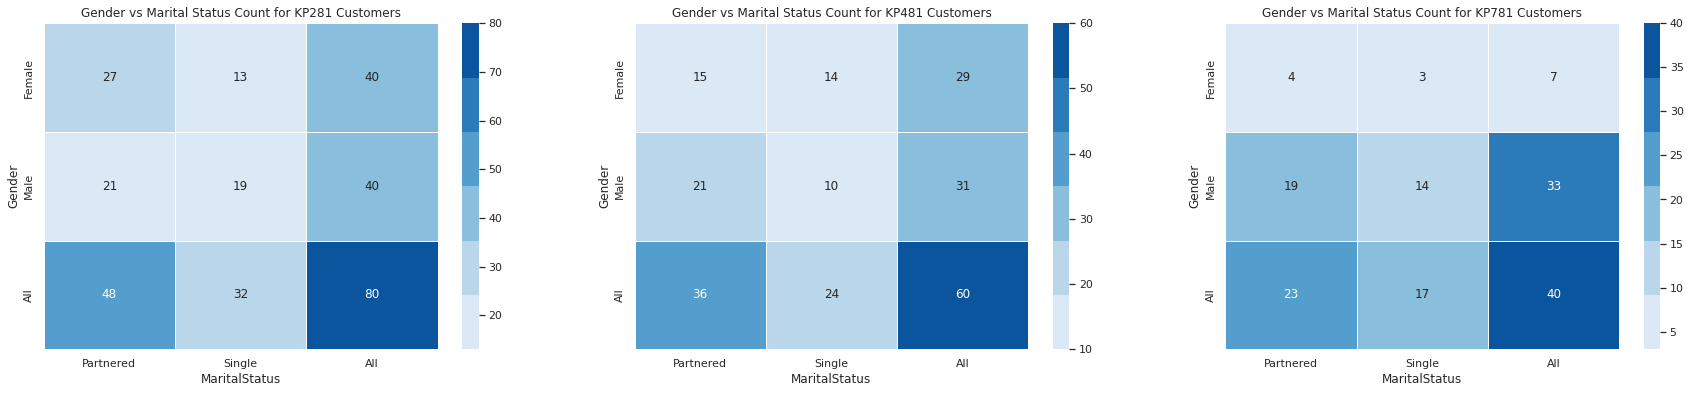

In [ ]:
df1 = pd.crosstab(index=aerofit[aerofit['Product'] == 'KP281']["Gender"], \
                  columns=aerofit[aerofit['Product'] == 'KP281']["MaritalStatus"], margins=True)
df2 = pd.crosstab(index=aerofit[aerofit['Product'] == 'KP481']["Gender"], \
                  columns=aerofit[aerofit['Product'] == 'KP481']["MaritalStatus"], margins=True)
df3 = pd.crosstab(index=aerofit[aerofit['Product'] == 'KP781']["Gender"], \
                  columns=aerofit[aerofit['Product'] == 'KP781']["MaritalStatus"], margins=True)
colormap = sns.color_palette("Blues")
fig,axes=plt.subplots(1,3,figsize=(30,6))
sns.heatmap(df1, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[0])
axes[0].set_title('Gender vs Marital Status Count for KP281 Customers')
sns.heatmap(df2, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[1])
axes[1].set_title('Gender vs Marital Status Count for KP481 Customers')
sns.heatmap(df3, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[2])
axes[2].set_title('Gender vs Marital Status Count for KP781 Customers')
plt.show()

**Let's find out conditional probability of customers being Male or Female given their Marital Status is 'Single' or 'Partnered'**

**Insights:**

For Product KP281

    - We see that conditional probability of customers being Female given that the Marital Status is 
    Partnered is 0.5625 (27/48)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Partnered is 0.4375 (21/48)
    - We see that conditional probability of customers being Female given that the Marital Status is 
    Single is 0.40625 (13/32)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Single is 0.59375 (19/32)


For Product KP481

    - We see that conditional probability of customers being Female given that the Marital Status is 
    Partnered is 0.417 (15/36)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Partnered is 0.583 (21/36)
    - We see that conditional probability of customers being Female given that the Marital Status is 
    Single is 0.583 (14/24)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Single is 0.417 (10/24)


For Product KP781

    - We see that conditional probability of customers being Female given that the Marital Status is 
    Partnered is 0.174 (4/23)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Partnered is 0.826 (19/23)
    - We see that conditional probability of customers being Female given that the Marital Status is 
    Single is 0.176 (3/17)
    - We see that conditional probability of customers being Male given that the Marital Status is 
    Single is 0.824 (14/17)

**Recommendation:**

    - Based on the above values of conditional probability, we can suggest/recommend that segment of 
    potential/interested customers who are either Female with Partners or Male customers who are Single, 
    have a very high probability of buying Entry-Level treadmill(KP281).

    - Based on the above values of conditional probability, we can suggest/recommend that segment of 
    potential/interested customers who are either Male with Partners or Female customers who are Single, 
    have a very high probability of buying Mid-Level treadmill(KP481).

    - Based on the above values of conditional probability, we can suggest/recommend that segment of 
    potential/interested customers who are Males have a very high probability of buying 
    Advanced treadmill(KP781) when compared to Female interested customers.